In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/drive/MyDrive/home loan project /apptrain_data')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_1,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,...,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_2,SK_DPD_DEF_2,NAME_CONTRACT_STATUS_Approved_2,NAME_CONTRACT_STATUS_Completed_2,NAME_CONTRACT_STATUS_Demand_2,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed_2,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,MONTHS_BALANCE,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,-1.0,1,0,1,1,0,8,1.0,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1437.0,0.0,-1072.0,-4185.0,5043.645,0.0,108131.945625,30722.625,3998.570625,0.0,3.0,-1185.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,-47.0,27.0,0.0,0.0,0.0,0.0,23.0,15.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,-1.0,1,0,1,1,0,3,2.0,1,1,11,0,0,0,0,0,0,39,0.311267,0.622246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2586.0,0.0,-2434.0,-3292.0,0.000,0.0,254350.125000,0.000,202500.000000,0.0,3.0,-2131.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,0,8,1.0,2,1,9,0,0,0,0,0,0,11,0.505998,0.555912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1326.0,0.0,-595.0,-1065.0,0.000,0.0,94518.900000,0.000,0.000000,0.0,3.0,-682.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,-1.0,1,0,1,0,0,8,2.0,2,6,17,0,0,0,0,0,0,5,0.505998,0.650442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,-1.0,1,0,1,0,0,3,1.0,2,4,11,0,0,0,0,1,1,37,0.505998,0.322738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1149.0,0.0,-783.0,-783.0,0.000,0.0,146250.000000,0.000,0.000000,0.0,3.0,-783.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.isna().sum().sum()

0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 199 entries, SK_ID_CURR to STATUS_X
dtypes: float64(144), int64(55)
memory usage: 466.9 MB


In [5]:
mat = data.corr()

feature selection 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel


In [8]:
target= data.pop('TARGET')
target

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [9]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_1,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_2,SK_DPD_DEF_2,NAME_CONTRACT_STATUS_Approved_2,NAME_CONTRACT_STATUS_Completed_2,NAME_CONTRACT_STATUS_Demand_2,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed_2,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,MONTHS_BALANCE,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,-1.0,1,0,1,1,0,8,1.0,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,0.139376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1437.0,0.0,-1072.0,-4185.0,5043.645,0.0,108131.945625,30722.625,3998.570625,0.0,3.0,-1185.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,-47.0,27.0,0.0,0.0,0.0,0.0,23.0,15.0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,-1.0,1,0,1,1,0,3,2.0,1,1,11,0,0,0,0,0,0,39,0.311267,0.622246,0.535276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2586.0,0.0,-2434.0,-3292.0,0.000,0.0,254350.125000,0.000,202500.000000,0.0,3.0,-2131.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,0,8,1.0,2,1,9,0,0,0,0,0,0,11,0.505998,0.555912,0.729567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1326.0,0.0,-595.0,-1065.0,0.000,0.0,94518.900000,0.000,0.000000,0.0,3.0,-682.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,-1.0,1,0,1,0,0,8,2.0,2,6,17,0,0,0,0,0,0,5,0.505998,0.650442,0.535276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,-1.0,1,0,1,0,0,3,1.0,2,4,11,0,0,0,0,1,1,37,0.505998,0.322738,0.535276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1149.0,0.0,-783.0,-783.0,0.000,0.0,146250.000000,0.000,0.000000,0.0,3.0,-783.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X = data
y = target

In [11]:
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [12]:
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_1,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_2,SK_DPD_DEF_2,NAME_CONTRACT_STATUS_Approved_2,NAME_CONTRACT_STATUS_Completed_2,NAME_CONTRACT_STATUS_Demand_2,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed_2,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,MONTHS_BALANCE,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,-1.0,1,0,1,1,0,8,1.0,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,0.139376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1437.0,0.0,-1072.0,-4185.0,5043.645,0.0,108131.945625,30722.625000,3998.570625,0.0,3.0,-1185.0,0.000000,0.0,6.0,0.0,0.0,0.0,0.0,-47.0,27.0,0.0,0.0,0.0,0.0,23.0,15.0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,-1.0,1,0,1,1,0,3,2.0,1,1,11,0,0,0,0,0,0,39,0.311267,0.622246,0.535276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2586.0,0.0,-2434.0,-3292.0,0.000,0.0,254350.125000,0.000000,202500.000000,0.0,3.0,-2131.0,0.000000,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,0,8,1.0,2,1,9,0,0,0,0,0,0,11,0.505998,0.555912,0.729567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1326.0,0.0,-595.0,-1065.0,0.000,0.0,94518.900000,0.000000,0.000000,0.0,3.0,-682.0,0.000000,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,-1.0,1,0,1,0,0,8,2.0,2,6,17,0,0,0,0,0,0,5,0.505998,0.650442,0.535276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,-1.0,1,0,1,0,0,3,1.0,2,4,11,0,0,0,0,1,1,37,0.505998,0.322738,0.535276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1149.0,0.0,-783.0,-783.0,0.000,0.0,146250.000000,0.000000,0.000000,0.0,3.0,-783.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,0,0,0,157500.0,254700.0,27558.0,6,7,4,2,5,0.032561,-9327,-236,-8456.0,-1982,-1.0,1,0,1,0,0,14,1.0,1,4,15,0,0,0,0,0,0,43,0.145570,0.681632,0.535276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252

In [13]:
y.shape

(307511,)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
model = LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.06765597529123357
0.14557069698116684
0.06925924543137342


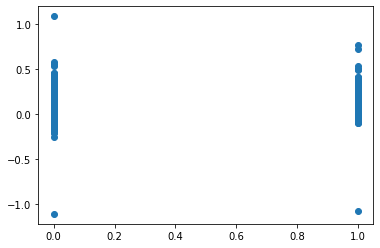

In [16]:
plt.scatter(y_test,y_predict)

In [17]:
X_train.shape

(230633, 198)

In [18]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression(solver='saga',max_iter=100)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9191576263690523

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9192356721038528

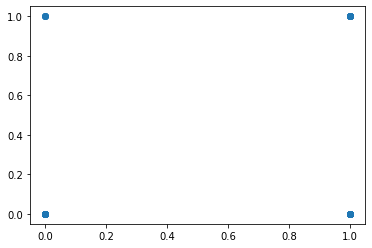

In [20]:
plt.scatter(y_test,y_predict)

In [21]:
y.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [23]:
from collections import Counter
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Actual Classes Counter({0: 212021, 1: 18612})
SMOTE Classes Counter({0: 212021, 1: 212021})


In [ ]:
model = LogisticRegression(solver='saga',max_iter=100000)
model.fit(X_train_smote,y_train_smote)
y_pre = model.predict(X_test)
accuracy_score(y_test,y_pre)
print(classification_report(y_test,y_pre))
confusion_matrix(y_test,y_pre)

              precision    recall  f1-score   support

           0       0.94      0.59      0.73     70676
           1       0.11      0.58      0.19      6202

    accuracy                           0.59     76878
   macro avg       0.53      0.59      0.46     76878
weighted avg       0.87      0.59      0.69     76878



array([[42040, 28636],
       [ 2600,  3602]])

In [ ]:
accuracy_score(y_test,y_pre)

0.5936939046281121

In [25]:
# xg boost method 
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9192616873487864
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70665
           1       0.55      0.01      0.01      6213

    accuracy                           0.92     76878
   macro avg       0.73      0.50      0.48     76878
weighted avg       0.89      0.92      0.88     76878

